# Исследование объявлений о продаже квартир

В нашем распоряжении данные сервиса Недвижимости — архив объявлений за несколько лет о продаже квартир в Санкт-Петербурге и соседних населённых пунктах.
Наша задача — выполнить предобработку данных и изучить их, чтобы найти интересные особенности и зависимости, которые существуют на рынке недвижимости.

О каждой квартире в базе содержится два типа данных: добавленные пользователем и картографические. Например, к первому типу относятся площадь квартиры, её этаж и количество балконов, ко второму — расстояния до центра города, аэропорта и ближайшего парка. 

### Описание данных

airports_nearest — расстояние до ближайшего аэропорта в метрах (м)

balcony — число балконов

ceiling_height — высота потолков (м)

cityCenters_nearest — расстояние до центра города (м)

days_exposition — сколько дней было размещено объявление (от публикации до снятия)

first_day_exposition — дата публикации

floor — этаж

floors_total — всего этажей в доме

is_apartment — апартаменты (булев тип)

kitchen_area — площадь кухни в квадратных метрах (м²)

last_price — цена на момент снятия с публикации

living_area — жилая площадь в квадратных метрах (м²)

locality_name — название населённого пункта

open_plan — свободная планировка (булев тип)

parks_around3000 — число парков в радиусе 3 км

parks_nearest — расстояние до ближайшего парка (м)

ponds_around3000 — число водоёмов в радиусе 3 км

ponds_nearest — расстояние до ближайшего водоёма (м)

rooms — число комнат

studio — квартира-студия (булев тип)

total_area — общая площадь квартиры в квадратных метрах (м²)

total_images — число фотографий квартиры в объявлении

### Открываем файл

In [26]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import sys

pd.set_option('display.float_format', lambda x: '%.3f' % x)

In [27]:
try:
    data = pd.read_csv('...', sep='\t')
except:
    data = pd.read_csv('...', sep='\t')

Импортировали библиотеки.
Убрали научные натации.
Открыли файл.

#### Изучаем общую информацию и определяем пропуски

In [28]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23699 non-null  int64  
 1   last_price            23699 non-null  float64
 2   total_area            23699 non-null  float64
 3   first_day_exposition  23699 non-null  object 
 4   rooms                 23699 non-null  int64  
 5   ceiling_height        14504 non-null  float64
 6   floors_total          23613 non-null  float64
 7   living_area           21796 non-null  float64
 8   floor                 23699 non-null  int64  
 9   is_apartment          2775 non-null   object 
 10  studio                23699 non-null  bool   
 11  open_plan             23699 non-null  bool   
 12  kitchen_area          21421 non-null  float64
 13  balcony               12180 non-null  float64
 14  locality_name         23650 non-null  object 
 15  airports_nearest   

Ознакомились с основной информацией о данных.

In [29]:
data.head(20)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.000,108.000,2019-03-07T00:00:00,3,2.700,16.000,51.000,8,NaN,...,25.000,NaN,Санкт-Петербург,18863.000,16028.000,1.000,482.000,2.000,755.000,NaN
1,7,3350000.000,40.400,2018-12-04T00:00:00,1,NaN,11.000,18.600,1,NaN,...,11.000,2.000,посёлок Шушары,12817.000,18603.000,0.000,NaN,0.000,NaN,81.000
2,10,5196000.000,56.000,2015-08-20T00:00:00,2,NaN,5.000,34.300,4,NaN,...,8.300,0.000,Санкт-Петербург,21741.000,13933.000,1.000,90.000,2.000,574.000,558.000
3,0,64900000.000,159.000,2015-07-24T00:00:00,3,NaN,14.000,NaN,9,NaN,...,NaN,0.000,Санкт-Петербург,28098.000,6800.000,2.000,84.000,3.000,234.000,424.000
4,2,10000000.000,100.000,2018-06-19T00:00:00,2,3.030,14.000,32.000,13,NaN,...,41.000,NaN,Санкт-Петербург,31856.000,8098.000,2.000,112.000,1.000,48.000,121.000
5,10,2890000.000,30.400,2018-09-10T00:00:00,1,NaN,12.000,14.400,5,NaN,...,9.100,NaN,городской посёлок Янино-1,NaN,NaN,NaN,NaN,NaN,NaN,55.000
6,6,3700000.000,37.300,2017-11-02T00:00:00,1,NaN,26.000,10.600,6,NaN,...,14.400,1.000,посёлок Парголово,52996.000,19143.000,0.000,NaN,0.000,NaN,155.000
7,5,7915000.000,71.600,2019-04-18T00:00:00,2,NaN,24.000,NaN,22,NaN,...,18.900,2.000,Санкт-Петербург,23982.000,11634.000,0.000,NaN,0.000,NaN,NaN
8,20,2900000.000,33.160,2018-05-23T00:00:00,1,NaN,27.000,15.430,26,NaN,...,8.810,NaN,посёлок Мурино,NaN,NaN,NaN,NaN,NaN,NaN,189.000
9,18,5400000.000,61.000,2017-02-26T00:00:00,3,2.500,9.000,43.600,7,NaN,...,6.500,2.000,Санкт-Петербург,50898.000,15008.000,0.000,NaN,0.000,NaN,289.000


Ознакомились с форматом данных таблицами.

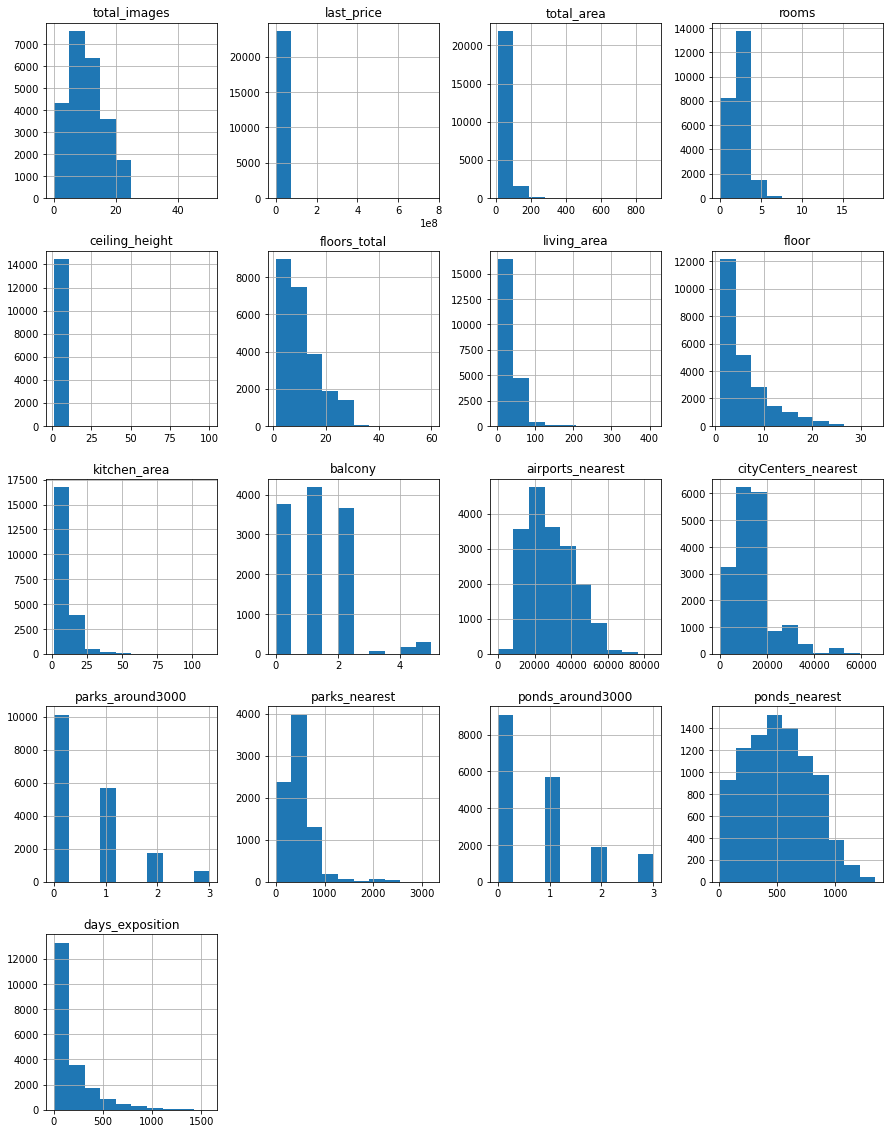

In [30]:
data.hist(figsize=(15, 20));

Ознакомились с гистограммами полученных данных.

### Предобработка данных

#### Описываем пропуски в данных

In [31]:
data.isna().sum()

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height           9195
floors_total               86
living_area              1903
floor                       0
is_apartment            20924
studio                      0
open_plan                   0
kitchen_area             2278
balcony                 11519
locality_name              49
airports_nearest         5542
cityCenters_nearest      5519
parks_around3000         5518
parks_nearest           15620
ponds_around3000         5518
ponds_nearest           14589
days_exposition          3181
dtype: int64

9195 - ceiling_height — высота потолков (м)
Люди могли просто не знать/замерить высоту потолков. Данные пропуски заполним медианным значением воизбежании влиение вбросов.

86 - floors_total — всего этажей в доме
Данный показатель является важным для принятия решений людей о покупке. Мы не можем заполнить эти значения данными, но их не много, мы их удалим.

1903 - living_area — жилая площадь в квадратных метрах (м²)
Этот показатель очень важен для исследования и пропуски имеют достатично большой объем от общей массы. Посчитаем примерную площадь по медианному значению стоимости одного квадратного метра.

20924 - is_apartment — апартаменты (булев тип)
Будем считать, что если данные не заполнены, то объект не является апартаментами.

2278 - kitchen_area — площадь кухни в квадратных метрах (м²)


11519 - balcony — число балконов
Будем считать, что если данные не заполнены, то объект не  имеет балкона.

59 - locality_name — название населённого пункта
В зависимости от населенного пункта цена за квадратный метр может сильно отличаться, строк не много, мы их удалим.

5542 - airports_nearest — расстояние до ближайшего аэропорта в метрах (м)
Оставляем NaN, так как среднее/медианное посчитать невозможно, а 0 поставить не можем, так как это исказит данные.

5519 - cityCenters_nearest — расстояние до центра города (м)
Оставляем NaN, так как среднее/медианное посчитать невозможно, а 0 поставить не можем, так как это исказит данные.

5518 - parks_around3000 — число парков в радиусе 3 км
Будем считать, что если данные не заполнены, то в ближайшем окружении парки отсутствуют.

15620 - parks_nearest — расстояние до ближайшего парка (м)
Оставляем NaN, так как среднее/медианное посчитать невозможно, а 0 поставить не можем, так как это исказит данные.

5518 - ponds_around3000 — число водоёмов в радиусе 3 км
Будем считать, что если данные не заполнены, то в ближайшем окружении водоемы отсутствуют.

14589 - ponds_nearest — расстояние до ближайшего водоёма (м)
Оставляем NaN, так как среднее/медианное посчитать невозможно, а 0 поставить не можем, так как это исказит данные.

3181 - days_exposition — сколько дней было размещено объявление (от публикации до снятия)
Оставляем NaN, так как среднее/медианное посчитать невозможно, а 0 поставить не можем, так как это исказит данные.

In [32]:
# пропущенные значения бары

def pass_value_barh(df):
    try:
        (
            (df.isna().mean()*100)
            .to_frame()
            .rename(columns = {0:'space'})
            .query('space > 0')
            .sort_values(by = 'space', ascending = True)
            .plot(kind = 'barh', figsize = (19,6), rot = -5, legend = False, fontsize = 16)
            .set_title('Пример' + "\n", fontsize = 22, color = 'SteelBlue')    
        );    
    except:
        print('пропусков не осталось :) или произошла ошибка в первой части функции ')

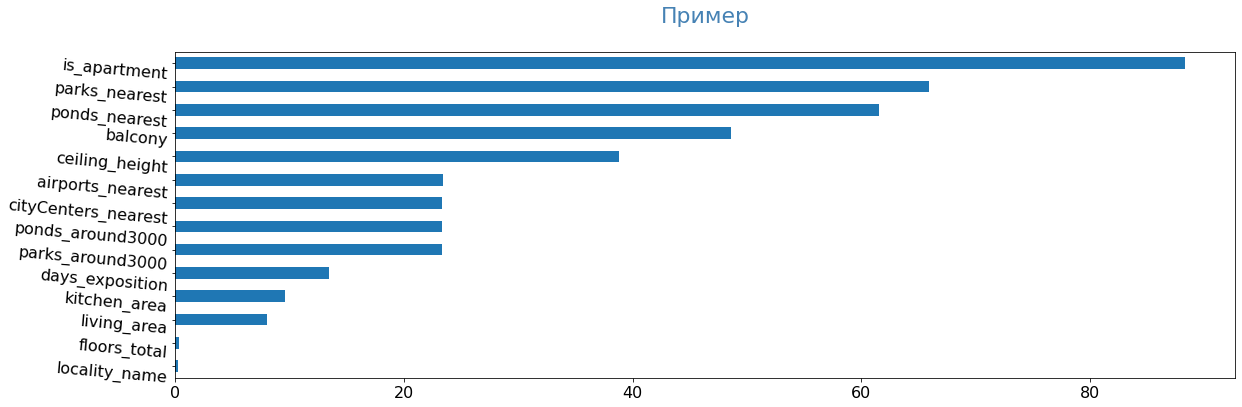

In [33]:
pass_value_barh(data)

#### Заполняем пропущенные значения там, где это возможно

In [34]:
#Назначили медианное значение для пропусков в столбце 'ceiling_height'
data['ceiling_height'] = data['ceiling_height'].fillna(data['ceiling_height'].median())
#Удалили строки, где не указано количество этажей
data = data.dropna(subset=['floors_total'])
#Добавили столбец с ценой за квадратный метр
data['avg_area_price'] = data['last_price'] / data['total_area']
#В строки с пропущенной жилой площадью вставили значение частного от медиан средней цены квадратного метра и цены объекта
data['living_area'] = data['living_area'].fillna(data['last_price'].median() / data['avg_area_price'].median())
#В строки с пропущенными данными о том является объект апартаментами ставим False
data['is_apartment'] = data['is_apartment'].fillna(False)
#В строки с пропущенными данными о количестве балконов отмечаем их отсутствие
data['balcony'] = data['balcony'].fillna(0)
#Удаляем строки с отсутствующим названием объекта
data = data.dropna(subset=['locality_name'])
#У строк где отсутствуют данные о наличии в округе парков или прудов фиксируем отсутствие таковых
data['parks_around3000'] = data['parks_around3000'].fillna(0)
data['ponds_around3000'] = data['ponds_around3000'].fillna(0)

data.reset_index(drop=True)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,avg_area_price
0,20,13000000.000,108.000,2019-03-07T00:00:00,3,2.700,16.000,51.000,8,False,...,0.000,Санкт-Петербург,18863.000,16028.000,1.000,482.000,2.000,755.000,NaN,120370.370
1,7,3350000.000,40.400,2018-12-04T00:00:00,1,2.650,11.000,18.600,1,False,...,2.000,посёлок Шушары,12817.000,18603.000,0.000,NaN,0.000,NaN,81.000,82920.792
2,10,5196000.000,56.000,2015-08-20T00:00:00,2,2.650,5.000,34.300,4,False,...,0.000,Санкт-Петербург,21741.000,13933.000,1.000,90.000,2.000,574.000,558.000,92785.714
3,0,64900000.000,159.000,2015-07-24T00:00:00,3,2.650,14.000,48.947,9,False,...,0.000,Санкт-Петербург,28098.000,6800.000,2.000,84.000,3.000,234.000,424.000,408176.101
4,2,10000000.000,100.000,2018-06-19T00:00:00,2,3.030,14.000,32.000,13,False,...,0.000,Санкт-Петербург,31856.000,8098.000,2.000,112.000,1.000,48.000,121.000,100000.000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23560,9,9700000.000,133.810,2017-03-21T00:00:00,3,3.700,5.000,73.300,3,False,...,0.000,Санкт-Петербург,24665.000,4232.000,1.000,796.000,3.000,381.000,NaN,72490.845
23561,14,3100000.000,59.000,2018-01-15T00:00:00,3,2.650,5.000,38.000,4,False,...,0.000,Тосно,NaN,NaN,0.000,NaN,0.000,NaN,45.000,52542.373
23562,18,2500000.000,56.700,2018-02-11T00:00:00,2,2.650,3.000,29.700,1,False,...,0.000,село Рождествено,NaN,NaN,0.000,NaN,0.000,NaN,NaN,44091.711
23563,13,11475000.000,76.750,2017-03-28T00:00:00,2,3.000,17.000,48.947,12,False,...,2.000,Санкт-Петербург,39140.000,10364.000,2.000,173.000,3.000,196.000,602.000,149511.401


In [35]:
data[data['total_area']*0.9 <= (data['living_area'] + data['kitchen_area'])]

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,avg_area_price
7,5,7915000.000,71.600,2019-04-18T00:00:00,2,2.650,24.000,48.947,22,False,...,2.000,Санкт-Петербург,23982.000,11634.000,0.000,NaN,0.000,NaN,NaN,110544.693
41,16,7900000.000,74.000,2016-05-04T00:00:00,3,2.650,14.000,59.000,8,False,...,5.000,Санкт-Петербург,37715.000,12612.000,1.000,725.000,1.000,759.000,179.000,106756.757
165,17,7430000.000,60.200,2019-02-28T00:00:00,2,2.500,4.000,48.947,2,False,...,0.000,Сестрорецк,54526.000,35625.000,0.000,NaN,0.000,NaN,NaN,123421.927
171,6,3800000.000,49.000,2019-02-22T00:00:00,2,2.500,9.000,38.000,8,False,...,1.000,посёлок Шушары,18471.000,24272.000,0.000,NaN,0.000,NaN,11.000,77551.020
184,7,2600000.000,30.200,2018-02-14T00:00:00,1,2.650,9.000,26.100,5,False,...,0.000,Санкт-Петербург,13952.000,15031.000,0.000,NaN,1.000,824.000,12.000,86092.715
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23426,17,8778000.000,47.500,2014-12-29T00:00:00,1,3.000,7.000,48.947,4,False,...,2.000,Санкт-Петербург,39412.000,10186.000,1.000,1424.000,3.000,204.000,1360.000,184800.000
23521,13,8500000.000,65.000,2018-11-01T00:00:00,2,2.650,4.000,44.000,2,False,...,0.000,Санкт-Петербург,22276.000,3996.000,1.000,627.000,0.000,NaN,NaN,130769.231
23534,9,3900000.000,39.000,2017-12-01T00:00:00,1,2.650,16.000,48.947,15,False,...,1.000,Санкт-Петербург,14730.000,13526.000,0.000,NaN,0.000,NaN,464.000,100000.000
23680,14,5000000.000,59.000,2019-04-04T00:00:00,3,2.500,5.000,52.000,1,False,...,0.000,Санкт-Петербург,26835.000,11878.000,0.000,NaN,0.000,NaN,NaN,84745.763


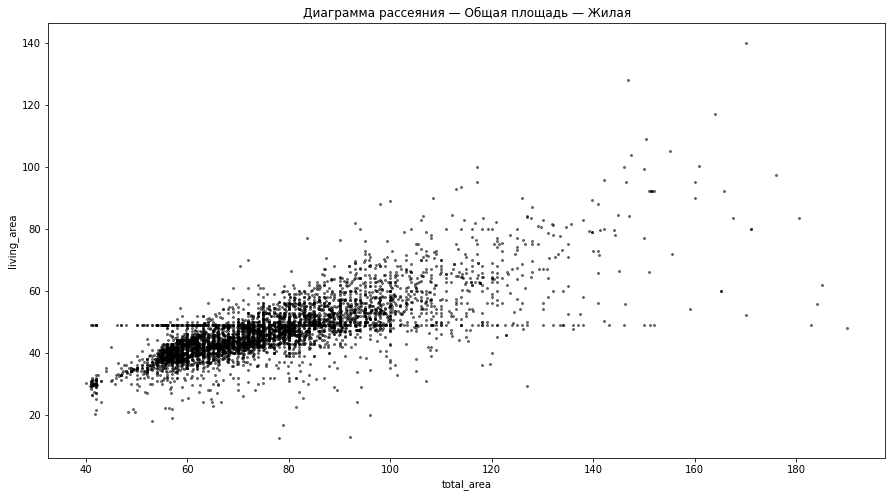

In [36]:
data[data['rooms'] == 3].query('total_area < 201 and last_price < 25_000_000').plot(kind='scatter',
        y='living_area' , x='total_area', alpha=0.5, subplots=True, figsize=(15,8), c = 'black', s = 4)
plt.title('Диаграмма рассеяния — Общая площадь — Жилая');

#### Устраняем неявные дубликаты в названиях населенных пунктов

In [37]:
#Создаем новый столбец с названиями населенных пунктов. Создаем список строк, которые могут создать дубликаты и циклом убираем из новосозданного столбца.
data['clear_locality_name'] = data['locality_name']
locality_name_cleaner = ['посёлок ', 'поселок ', 'городского типа ', 'городской ', 'деревня ',\
                         'садовое товарищество ', 'село ', 'коттеджный ', 'станции ',\
                         'садоводческое некоммерческое товарищество ', 'при железнодорожной ']

for name in locality_name_cleaner:
    data['clear_locality_name'] = data['clear_locality_name'].str.replace(name, '')

In [38]:
data.clear_locality_name.nunique()

305

In [39]:
data.clear_locality_name.unique()

array(['Санкт-Петербург', 'Шушары', 'Янино-1', 'Парголово', 'Мурино',
       'Ломоносов', 'Сертолово', 'Петергоф', 'Пушкин', 'Кудрово',
       'Коммунар', 'Колпино', 'Красный Бор', 'Гатчина', 'Фёдоровское',
       'Выборг', 'Кронштадт', 'Кировск', 'Новое Девяткино',
       'Металлострой', 'Лебяжье', 'Сиверский', 'Молодцово',
       'Кузьмоловский', 'Новая Ропша', 'Павловск', 'Пикколово',
       'Всеволожск', 'Волхов', 'Кингисепп', 'Приозерск', 'Сестрорецк',
       'Куттузи', 'Аннино', 'Ефимовский', 'Плодовое', 'Заклинье',
       'Торковичи', 'Первомайское', 'Красное Село', 'Понтонный',
       'Сясьстрой', 'Старая', 'Лесколово', 'Новый Свет', 'Сланцы',
       'Путилово', 'Ивангород', 'Шлиссельбург', 'Никольское',
       'Зеленогорск', 'Сосновый Бор', 'Оржицы', 'Кальтино', 'Романовка',
       'Бугры', 'Рощино', 'Кириши', 'Луга', 'Волосово', 'Отрадное',
       'Павлово', 'Оредеж', 'Копорье', 'Молодёжное', 'Тихвин', 'Победа',
       'Нурма', 'Синявино', 'Тосно', 'Стрельна', 'Бокситогорск',

#### Преобразуем тип данных в столбцах, где это нужно

In [40]:
# Убираем десятичные, так как копейки нам не нужны
data['last_price'] = data['last_price'].astype('int')
# Меняем данные на формат даты
data['first_day_exposition'] = pd.to_datetime(data['first_day_exposition'], format='%Y-%m-%dT%H:%M:%S')
# Убираем десятичные за ненадобностью
data['floors_total'] = data['floors_total'].astype('int')
# Приводим к логичному формату
data['is_apartment'] = data['is_apartment'].astype('bool')
# Убираем десятичные за ненадобностью
data['balcony'] = data['balcony'].astype('int')
# Убираем десятичные за ненадобностью
data['parks_around3000'] = data['parks_around3000'].astype('int')
# Убираем десятичные за ненадобностью
data['ponds_around3000'] = data['ponds_around3000'].astype('int')
# Убираем десятичные, так как копейки нам не нужны
data['avg_area_price'] = data['avg_area_price'].astype('int')

In [41]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23565 entries, 0 to 23698
Data columns (total 24 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   total_images          23565 non-null  int64         
 1   last_price            23565 non-null  int64         
 2   total_area            23565 non-null  float64       
 3   first_day_exposition  23565 non-null  datetime64[ns]
 4   rooms                 23565 non-null  int64         
 5   ceiling_height        23565 non-null  float64       
 6   floors_total          23565 non-null  int64         
 7   living_area           23565 non-null  float64       
 8   floor                 23565 non-null  int64         
 9   is_apartment          23565 non-null  bool          
 10  studio                23565 non-null  bool          
 11  open_plan             23565 non-null  bool          
 12  kitchen_area          21343 non-null  float64       
 13  balcony         

#### Убираем выбивающиеся значения

In [42]:
#Все значения высот потолков которые равны или больше 20-и метров, мы делим на 10
data['ceiling_height'] = data['ceiling_height'].apply(lambda x: x/10 if x>=20 else x)
#Заменяем значения расстояния до аэропорта равные 0-ю на тип None
data['airports_nearest'] =  data['airports_nearest'].replace(0, None)

data = data.query('0 < rooms < 8')
data = data.query('22 < total_area < 380')
data = data.query('561384 <= last_price <= 36000000')
data = data.query('2.4 <= ceiling_height <= 5')
data = data.query('2 <= floors_total <= 35')

### Посчитайте и добавьте в таблицу новые столбцы

In [43]:
#Цена одного квадратного метра подсчитана ранее и добавлена под названием 'avg_area-price'
#Добавляем день недели публикации объявления
data['weekday'] = data['first_day_exposition'].dt.weekday
#Добавляем месяц публикации объявления
data['month_number'] = data['first_day_exposition'].dt.month
#Добавляем год публикации объявления
data['year'] = data['first_day_exposition'].dt.year
#Добавлен тип этажа объявления (первый, последний, другой)
def categorize_floor(df):
    floor = df['floor']
    floors_total = df['floors_total']

    if floor == 1:
            return 'первый'
    if floor == floors_total:
            return 'последний'
    return 'другой'

data['floor_type'] = data.apply(categorize_floor, axis=1)
#Подсчитано и добавлено расстояние до центра города в километрах
data['cityCenters_nearest_km'] = data['cityCenters_nearest'] / 1000

### Проведите исследовательский анализ данных

#### Площадь объекта

count   22966.000
mean       58.775
std        28.178
min        22.230
25%        40.100
50%        52.000
75%        69.000
max       365.000
Name: total_area, dtype: float64


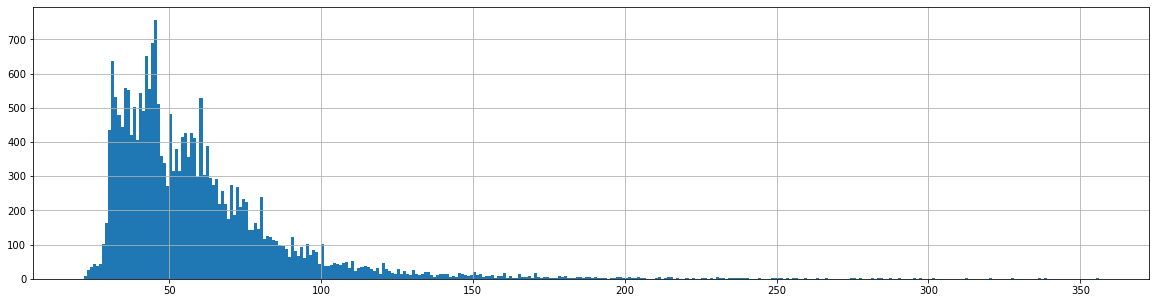

In [44]:
print(data['total_area'].describe())
data['total_area'].hist(bins=334, figsize=(20, 5), range=(22, 356));

**Вывод:**
Основной объем квартир приходится на площадь с 40 до 70 квадратных метров. Самые типовые квартиры это 40 - 45 и 60 квадратных метров.

#### Жилая площадь

count   22966.000
mean       34.808
std        18.189
min         2.000
25%        19.100
50%        31.000
75%        45.500
max       248.500
Name: living_area, dtype: float64


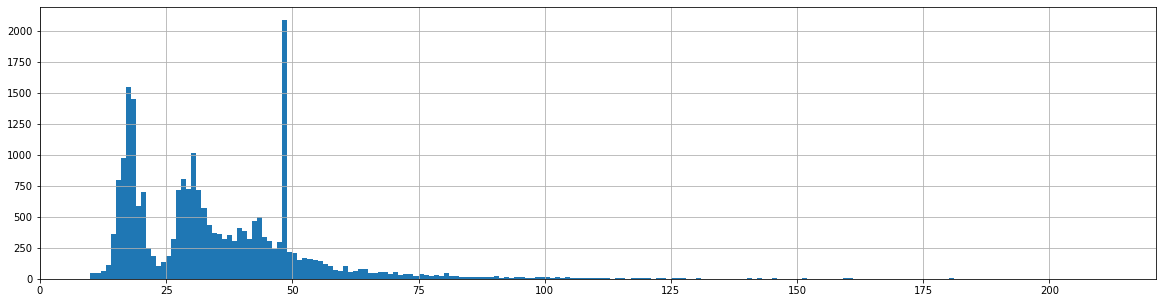

In [45]:
print(data['living_area'].describe())
data['living_area'].hist(bins=201, figsize=(20, 5), range=(10, 211));

**Вывод:**
По жилой площади основные объекты находятся между 20 и 49 метрами. Среди них преобладает медианное значение - 31 квадратный метр. Также, мы видим большие скачки на гистограмме всех данных: около 20 и 49 метров.

#### Площадь кухни

count   21030.000
mean       10.359
std         5.220
min         1.300
25%         7.000
50%         9.000
75%        11.900
max       100.700
Name: kitchen_area, dtype: float64


<AxesSubplot:>

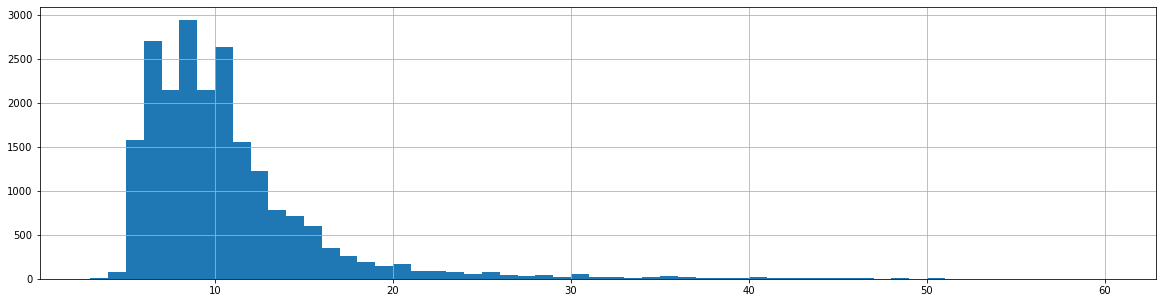

In [46]:
print(data['kitchen_area'].describe())
data['kitchen_area'].hist(bins=57, figsize=(20, 5), range=(3, 60))

**Выводы:**
Самые частые площади кухонь от 6 до 11 квадратных метров. С явным проявлением 6, 8 и 10 метров.

#### Цена объекта

count      22966.000
mean     5856838.907
std      4308274.610
min       565000.000
25%      3450000.000
50%      4650000.000
75%      6700000.000
max     36000000.000
Name: last_price, dtype: float64


<AxesSubplot:>

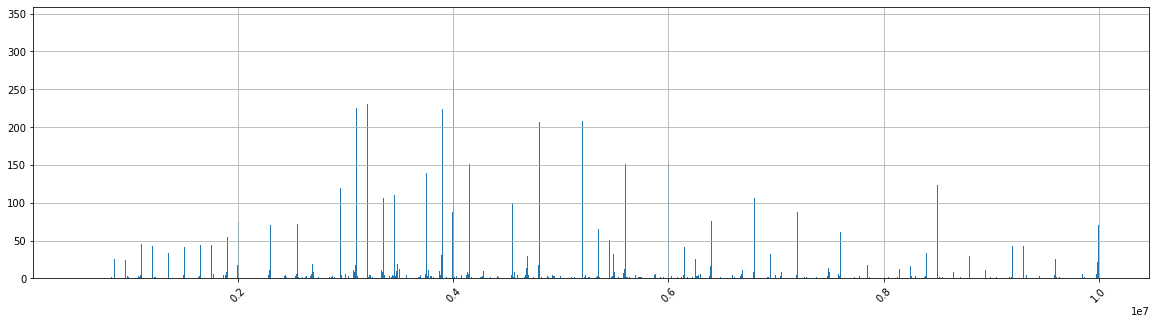

In [47]:
print(data['last_price'].describe())
data['last_price'].hist(bins=4000, figsize=(20, 5), xrot=45, range=(565000, 10000000));

**Выводы:**
Основная масса квартир продается с 3 до 5 миллионов. Интересное распределение всех цен видно на гистограмме всех цен. Можно увидеть, что шаг цен примерно одинаковый.

#### Количество комнат

count   22966.000
mean        2.060
std         0.997
min         1.000
25%         1.000
50%         2.000
75%         3.000
max         7.000
Name: rooms, dtype: float64

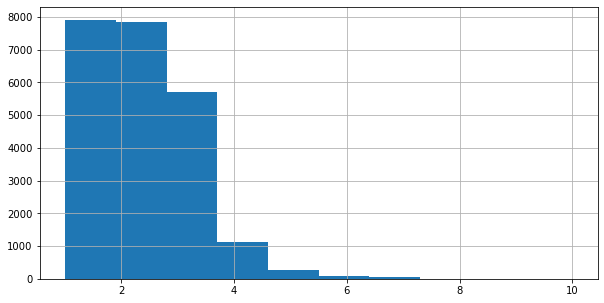

In [48]:
data['rooms'].hist(bins=10, figsize=(10, 5), range=(1, 10))
data['rooms'].describe()

**Выводы:**
Основные квартиры, которые продаются, с 1, 2 или 3 комнатами.

#### Высота потолков

count   22966.000
mean        2.692
std         0.207
min         2.400
25%         2.600
50%         2.650
75%         2.700
max         4.800
Name: ceiling_height, dtype: float64

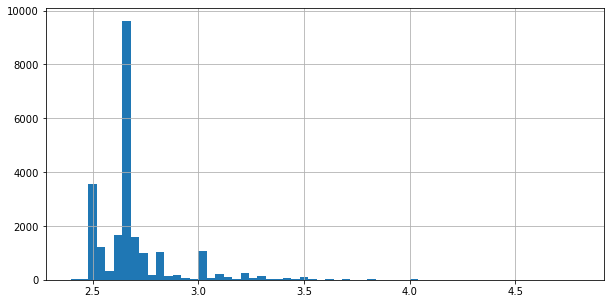

In [49]:
data['ceiling_height'].hist(bins=60, figsize=(10, 5))
data['ceiling_height'].describe()

**Выводы:**
Основная масса квартир имеет самую стандартную высоту потолков.

#### Этаж квартиры

count   22966.000
mean        5.870
std         4.860
min         1.000
25%         2.000
50%         4.000
75%         8.000
max        33.000
Name: floor, dtype: float64

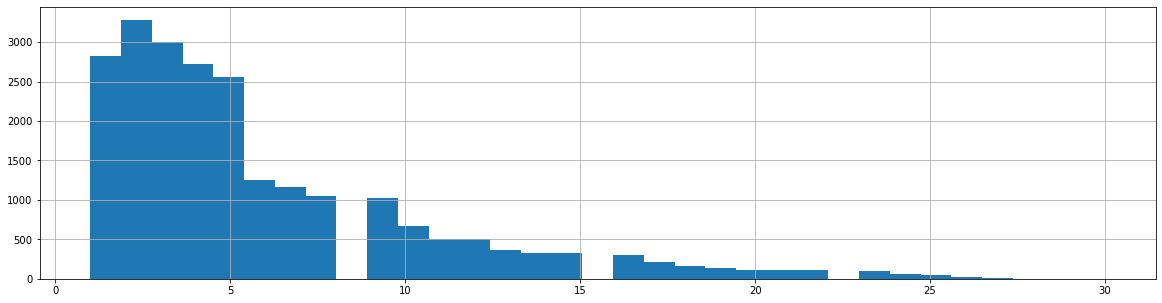

In [50]:
data['floor'].hist(bins=33, figsize=(20, 5), range=(1, 30))
data['floor'].describe()

**Выводы:**
Квартиры с 1 по 5 этаж продаются чаще всего. Квартиры с более высоким этажом продаются сильно реже.

#### Тип этажа квартиры

<AxesSubplot:>

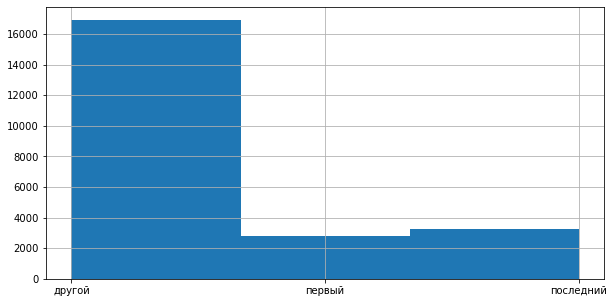

In [52]:
data['floor_type'].hist(bins=3, figsize=(10, 5));

**Выводы:**
Первые и последние этажи продаются примерно в одинаковом соотношении. Каждая категория покрывает собой примерно 10% выборки.

#### Общее количество этажей в доме

count   22966.000
mean       10.672
std         6.559
min         2.000
25%         5.000
50%         9.000
75%        16.000
max        35.000
Name: floors_total, dtype: float64

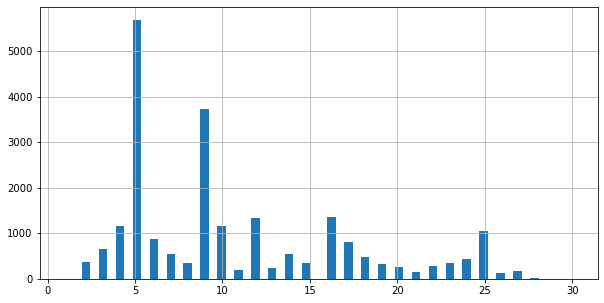

In [53]:
data['floors_total'].hist(bins=60, figsize=(10, 5), range=(1, 30))
data['floors_total'].describe()

**Выводы:**
Самые типовые постройки имеют 5 и 9 этажей.

#### Расстояние до центра города

count   17638.000
mean       14.324
std         8.606
min         0.181
25%         9.492
50%        13.169
75%        16.333
max        65.968
Name: cityCenters_nearest_km, dtype: float64

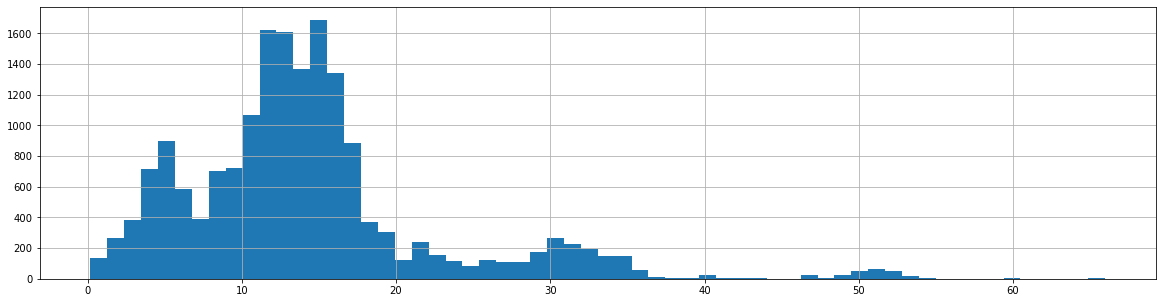

In [54]:
data['cityCenters_nearest_km'].hist(bins=60, figsize=(20, 5),)
data['cityCenters_nearest_km'].describe()

**Выводы:**
Основная часть объектов продается на расстоянии с 11 до 16 километров от центра города. Но можно заметить большой скачек объектов в диапазоне от 4 до 5 километров. 

#### Расстояние до ближайшего аэропорта

count   17618.000
mean    28864.663
std     12694.390
min      6450.000
25%     18498.500
50%     26866.500
75%     37407.000
max     84869.000
Name: airports_nearest, dtype: float64

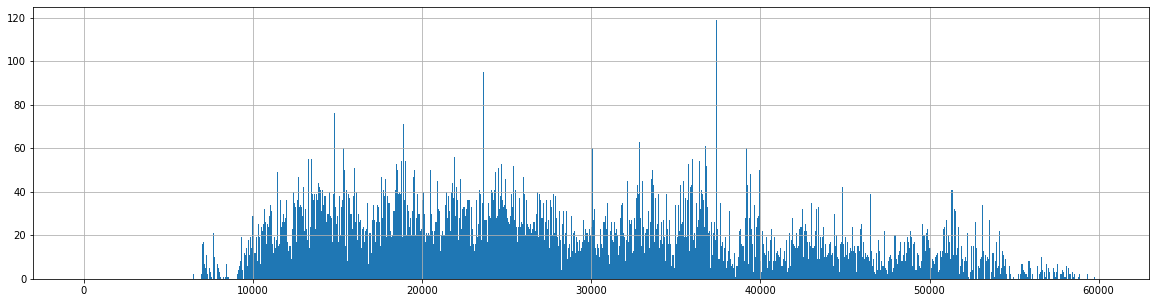

In [55]:
data['airports_nearest'].hist(bins=1000, figsize=(20, 5), range=(0, 60000))
data['airports_nearest'].describe()

**Выводы:**
Основная часть объектов продается на расстоянии с 15 до 40 километров. Ближе 6 и дальше 60 километров объектов, практически, не продается.

#### Расстояние до ближайшего парка

count   7786.000
mean     492.401
std      342.123
min        1.000
25%      288.250
50%      456.000
75%      613.000
max     3190.000
Name: parks_nearest, dtype: float64

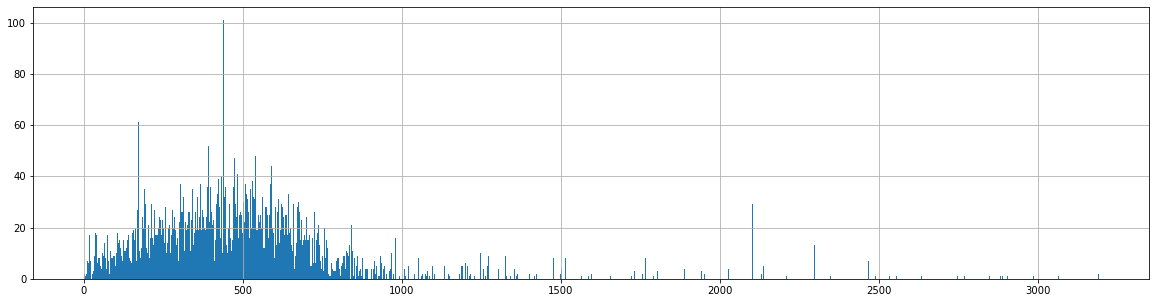

In [56]:
data['parks_nearest'].hist(bins=1500, figsize=(20, 5))
data['parks_nearest'].describe()

**Выводы:**
Основная часть объектов продается на расстоянии с 1 до 600 метров от ближайшего парка.

#### День и месяц публикации объявления

<AxesSubplot:>

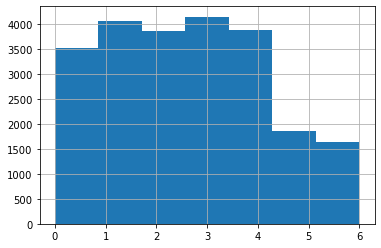

In [57]:
data['weekday'].hist(bins=7);

**Выводы:**
В основном продажей квартир занимаются в будние дни.

<AxesSubplot:>

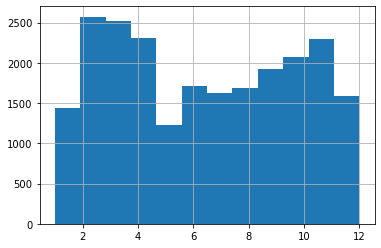

In [58]:
data['month_number'].hist(bins=12);

**Выводы:**
В январе, мае и декабре активность продажи квартир ниже всего. От января до лета происходит падение интереса к продаже квартир. Летом количество продаж на одном уровне, осенью он начинает расти.

#### Как быстро продавались квартиры

count   19890.000
mean      180.370
std       219.202
min         1.000
25%        45.000
50%        95.000
75%       230.000
max      1580.000
Name: days_exposition, dtype: float64

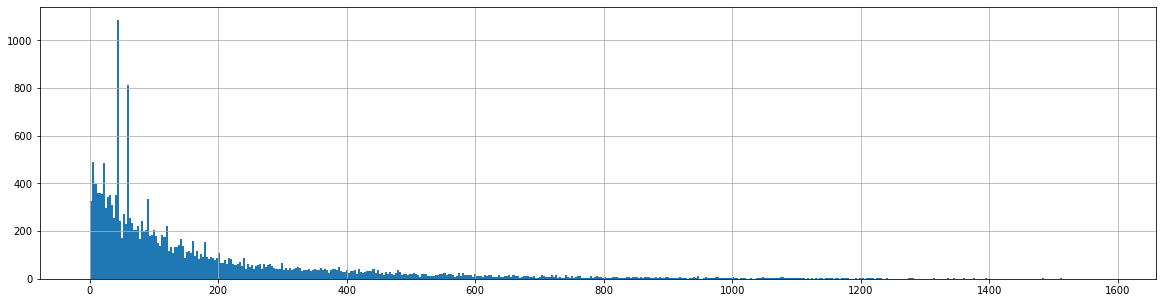

In [59]:
data['days_exposition'].hist(bins=500, figsize=(20, 5))
data['days_exposition'].describe()

**Выводы:**
От 45 до 229 дня занимает продажа объекта у основной массы людей.
Более быстрая или медленная продажа является необычным показателем. Возможно, более долгие продажи обусловленны тем, что люди перестают заниматься объявлением и/или отвечать на звонки или сообщения от потенциальных покупателей.

#### Определяем какие факторы больше всего влияют на общую стоимость объекта.

0.7897366457594953

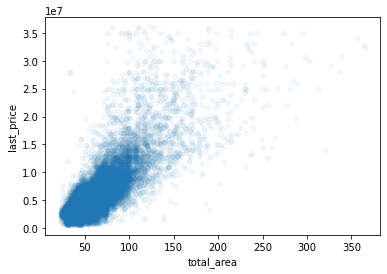

In [60]:
# Влияние общей площади
data.plot(x='total_area', y='last_price', kind='scatter', alpha=0.05)
data['last_price'].corr(data['total_area'])

**Выводы:**
Видна достаточно сильная и равномерная зависимость цены от площади объекта. Чем больше площадь, тем большая средняя цена. Корреляция в 0.79 может обуславливаться сторонними факторами, например: состоянием квартиры. Так как маленькая квартира с хорошим ремонтом может стоить на уровне или даже выше чем большая квартира с плохим ремонтом.

0.6353187666492588

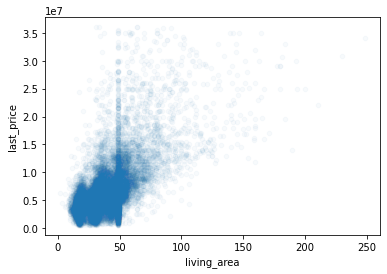

In [61]:
# Влияние жилой площади
data.plot(x='living_area', y='last_price', kind='scatter', alpha=0.03)
data['last_price'].corr(data['living_area'])

**Выводы:**
Видна достаточно сильная и равномерная зависимость цены от жилой площади объекта. Чем больше площадь, тем большая средняя цена. Корреляция в 0.63 показывасет сильную зависимость цены от жилой площади, но меньшую, чем общая.
Заметно, что жилая площадь в 50 квадратных метров часто является стандартным размером в большем количестве объектов.

0.6020676982667916

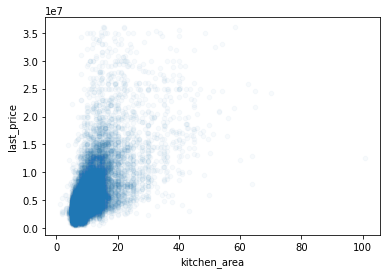

In [62]:
# Влияние площади кухни
data.plot(x='kitchen_area', y='last_price', kind='scatter', alpha=0.03)
data['last_price'].corr(data['kitchen_area'])

**Выводы:**
Диаграмма похожа на ту, что отображала зависимость цены от жилой площади, но с меньшей корреляцией в 0.61. Также, нет стандартной площади, как это было с жилой в 50 метров.

0.5107824496754148

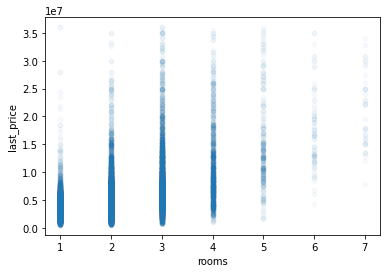

In [63]:
# Влияние количества комнат
data.plot(x='rooms', y='last_price', kind='scatter', alpha=0.03)
data['last_price'].corr(data['rooms'])

**Выводы:**
Видна зависимость от количества комнат. Чем меньше комнат тем большая концентрация низкой стоимости объекта и наоборот.

<AxesSubplot:xlabel='floor_type'>

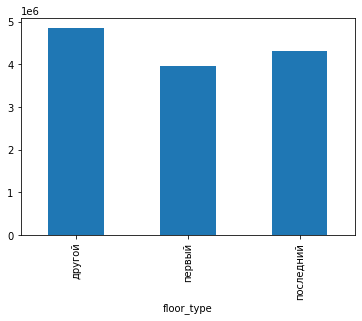

In [64]:
# Влияние типа этажа
(
data.groupby('floor_type')['last_price'].agg('median')
.plot(x='floor_type', y='median', kind='bar')
)

**Выводы:**
В среднем, цена квартиры на первом этаже ниже чем квартиры на последнем, но и те и другие ниже по цене, чем квартиры на других этажах.

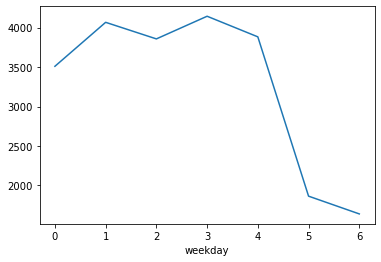

In [80]:
# Влияние дня недели
(
data.groupby('weekday')['last_price'].agg('count')
.plot(x='weekday', y='median', kind='line')
);

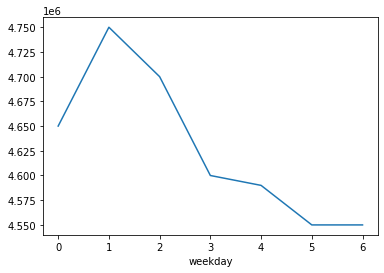

In [81]:
(
data.groupby('weekday')['last_price'].agg('median')
.plot(x='weekday', y='median', kind='line')
);

**Выводы:**
Основной объем объявлений публикуется в будние дни. Скорее всего, понедельник является тяжелым днем для основной массы людей, в связи с этим есть небольшая просадка по количеству объявлений. В субботу и воскресенье публикаций минимальное количество.
Медианная цена объявления самая высокая во вторник и среду с четверга по субботу идет падение до минимума, в воскресенье минимум держится, а в понедельник начинается рост.

<AxesSubplot:xlabel='month_number'>

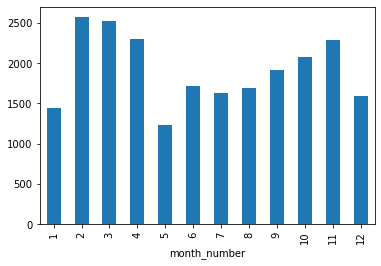

In [67]:
# Влияние месяца
(
data.groupby('month_number')['last_price'].agg('count')
.plot(x='month_number', y='median', kind='bar')
);

<AxesSubplot:xlabel='month_number'>

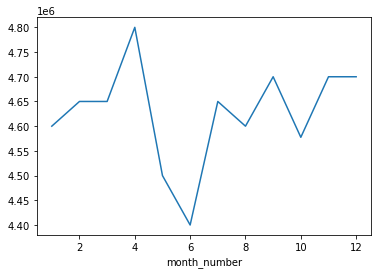

In [68]:
(
data.groupby('month_number')['last_price'].agg('median')
.plot(x='month_number', y='median', kind='line')
);

**Выводы:**
В апреле медианная цена является наивысшей, к июню идет резкое падения до минимума. В остальные месяцы цена находится около медианной.

<AxesSubplot:xlabel='year'>

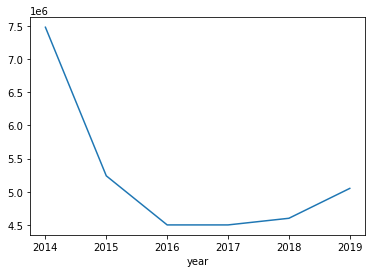

In [69]:
# Влияние года
(
data.groupby('year')['last_price'].agg('median')
.plot(x='year', y='median', kind='line')
);

In [70]:
year_df = data.groupby('year')['last_price'].agg(['count', 'median'])
area_df = data.groupby('year')['total_area'].agg(['count', 'median'])
year_df.columns = ['sales_count', 'median_price']
year_df['median_area'] = area_df['median']
year_df

,sales_count,median_price,median_area
year,,,
2014,129,7476560.000,75.030
2015,1125,5239000.000,60.000
2016,2685,4500000.000,53.000
2017,7934,4500000.000,52.000
2018,8292,4600000.000,50.735
2019,2801,5050000.000,51.800


**Выводы:**
Видна зависимость количества объявлений к медианной цене. Чем меньше объявлений, тем больше медианная цена. Рыночная зависимость - чем меньше предложения при том же спросе тем выше цена. Возможно, здесь виден данный закон. Также, заметно падение метража объектов, с 2017 до 2019 метраж стабилизируется.
Также, заметен быстрый рост количества, объявлений с 2014 года до 2017, в 2018 году рост сильно замедляется. В 2019 году заметно резкое падение количество объявлений (в условиях, что датасет имеет данные за весь 2019 год).

#### Определяем среднюю цену одного квадратного метра в 10 населённых пунктах с наибольшим числом объявлений.

                     sales_count  avg_area_price
clear_locality_name                             
Санкт-Петербург            15239      111053.510
Мурино                       553       85419.165
Кудрово                      447       95052.083
Шушары                       434       78227.422
Всеволожск                   390       68711.972
Пушкин                       366      103085.503
Колпино                      336       75239.161
Парголово                    323       90289.353
Гатчина                      307       68745.694
Выборг                       233       57967.043


<AxesSubplot:xlabel='clear_locality_name'>

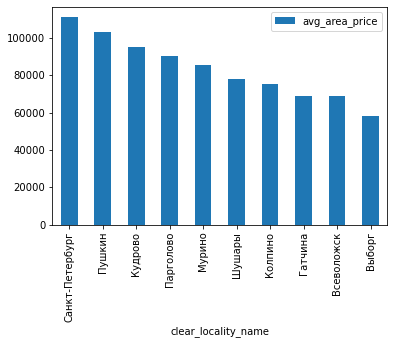

In [71]:
popular_locations = data.groupby('clear_locality_name')['avg_area_price'].agg(['count', 'mean'])
popular_locations.columns = ['sales_count', 'avg_area_price']
final_popular_locations = popular_locations.sort_values('sales_count', ascending=False).head(10)
print(final_popular_locations)
(
final_popular_locations.reset_index()
.sort_values('avg_area_price', ascending=False)
.plot(x='clear_locality_name', y='avg_area_price', kind='bar')
);

**Выводы:**
Самая высокая цена одного квадратного метра из 10и населенных пунктов с самым большим количеством объявлений в Санкт-Петербурге и равняется 110 тысячам, а самая низкая в Выборге и равняется 58 тысячам.

#### Определяем среднюю цену каждого километра

-0.41229605885043663
                        count         mean
cityCenters_nearest_km                    
0.000                      20 16592877.800
1.000                     170 12490717.641
2.000                     273 11112164.835
3.000                     338 10058663.760
4.000                     665 10768379.741
5.000                     856 11068205.627
6.000                     557 10589548.084
7.000                     378 10215303.868
8.000                     579  8937915.648
9.000                     586  6933222.435
10.000                    709  6382936.147
11.000                   1165  6119696.307
12.000                   1580  5852550.430
13.000                   1430  6115952.735
14.000                   1257  5655219.171
15.000                   1549  5841977.200
16.000                   1253  5397718.402
17.000                    855  5253395.388
18.000                    260  5099374.904
19.000                    154  5081623.149
20.000                     43  59

/var/folders/r2/3pwdwlyj6gd_lhry1fbfyqdr0000gn/T/ipykernel_73333/3936396502.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  peter_kilometr_price['cityCenters_nearest_km'] = peter_kilometr_price['cityCenters_nearest_km'].round()


<AxesSubplot:xlabel='cityCenters_nearest_km'>

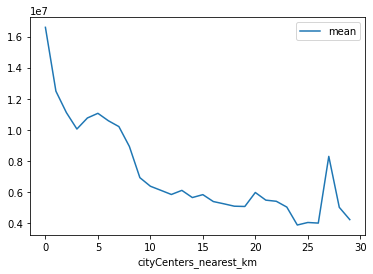

In [72]:
peter_kilometr_price = data.query('clear_locality_name == "Санкт-Петербург"')
peter_kilometr_price['cityCenters_nearest_km'] = peter_kilometr_price['cityCenters_nearest_km'].round()
print(peter_kilometr_price['last_price'].corr(peter_kilometr_price['cityCenters_nearest_km']))
final_peter_kilometr_price = peter_kilometr_price.groupby('cityCenters_nearest_km')['last_price'].agg(['count', 'mean'])
print(final_peter_kilometr_price)



(
final_peter_kilometr_price.reset_index()
.plot(x='cityCenters_nearest_km', y='mean', kind='line')
)

In [73]:
peter_kilometr_price[peter_kilometr_price['cityCenters_nearest_km'] == 27]

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,ponds_around3000,ponds_nearest,days_exposition,avg_area_price,clear_locality_name,weekday,month_number,year,floor_type,cityCenters_nearest_km
748,13,14350000,74.000,2017-11-28,2,3.130,5,30.000,3,False,...,0,NaN,128.000,193918,Санкт-Петербург,1,11,2017,другой,27.000
5961,6,2250000,32.000,2018-02-27,1,2.650,2,16.500,2,False,...,0,NaN,178.000,70312,Санкт-Петербург,1,2,2018,последний,27.000


**Выводы:**
Чем ближе квартира к центру, тем она стоит дороже.  
Заметно небольшое падение цены на 3м километре, к 5у цена увеличивается и начинается стабильное падение. На 27м километре виден резкий скачек цены, он появляется из-за наличия на данном километре только 2 объявления, один из них с ценой в 14.4 миллиона.

In [74]:
peter_kilometr_price[peter_kilometr_price['cityCenters_nearest_km'] == 3].groupby('floor_type')['floor_type'].agg('count')

floor_type
другой       207
первый        54
последний     77
Name: floor_type, dtype: int64

In [75]:
peter_kilometr_price[peter_kilometr_price['cityCenters_nearest_km'] == 5].groupby('floor_type')['floor_type'].agg('count')

floor_type
другой       647
первый        77
последний    132
Name: floor_type, dtype: int64

### Общий вывод

**Самые частые показатели выборки:**
- Основной объем квартир приходится на площадь с 40 до 70 квадратных метров. 
- Самые типовые квартиры это 40 - 45 и 60 квадратных метров.
- По жилой площади основные объекты находятся между 19 и 46 метрами. Среди них преобладает медианное значение - 31 квадратный метр. 
- Видим большие скачки на гистограмме всех данных: около 17 и 47 метров.
- Самые частые площади кухонь от 7 до 9 квадратных метров. С явным проявлением 9 и 10.5 метров.
- Основная масса квартир продается с 3.5 до 6.5 миллионов. Интересное распределение всех цен видно на гистограмме всех цен. Можно увидеть, что шаг цен примерно одинаковый.
- Основные квартиры, которые продаются, с 1, 2 или 3 комнатами.
- Основная масса квартир имеет самую стандартную высоту потолков.
- Квартиры с 1 по 5 этаж продаются чаще всего. Квартиры с более высоким этажом продаются сильно реже.
- Первые и последние этажи продаются примерно в одинаковом соотношении. Каждая категория покрывает собой примерно 10% выборки.
- Самые типовые постройки имеют 5 и 9 этажей.
- Основная часть объектов продается на расстоянии с 9 до 16 километров от центра города. Но можно заметить большой скачек объектов в диапазоне от 4 до 6 километров. 
- Основная часть объектов продается на расстоянии с 18.5 до 37 километров. Ближе 6 и дальше 60 километров объектов, практически, не продается.
- Основная часть объектов продается на расстоянии с 1 до 600 метров от ближайшего парка.
- В основном продажей квартир занимаются в будние дни.
- В январе, мае и декабре активность продажи квартир ниже всего. От января до лета происходит падение интереса к продаже квартир. Летом количество продаж на одном уровне, осенью он начинает расти.

**Время продажи объекта:**
- От 45 до 231 дня занимает продажа объекта у основной массы людей.
- Более быстрая или медленная продажа является необычным показателем. Возможно, более долгие продажи обусловленны тем, что люди перестают заниматься объявлением и/или отвечать на звонки или сообщения от потенциальных покупателей.

**Зависимость цены от других факторов:**
- Видна достаточно сильная и равномерная зависимость цены от площади объекта. Чем больше площадь, тем большая средняя цена. Корреляция в 0.79 может обуславливаться сторонними факторами, например: состоянием квартиры. Так как маленькая квартира с хорошим ремонтом может стоить на уровне или даже выше чем большая квартира с плохим ремонтом.
- Видна достаточно сильная и равномерная зависимость цены от жилой площади объекта. Чем больше площадь, тем большая средняя цена. Корреляция в 0.63 показывасет сильную зависимость цены от жилой площади, но меньшую, чем общая.
- Заметно, что жилая площадь в 50 квадратных метров часто является стандартным размером в большем количестве объектов.
- Диаграмма похожа на ту, что отображала зависимость цены от жилой площади, но с меньшей корреляцией в 0.61. Также, нет стандартной площади, как это было с жилой в 50 метров.
- Видна зависимость от количества комнат. Чем меньше комнат тем большая концентрация низкой стоимости объекта и наоборот.
- В среднем, цена квартиры на первом этаже ниже чем квартиры на последнем, но и те и другие ниже по цене, чем квартиры на других этажах.
- Основной объем объявлений публикуется в будние дни. Скорее всего, понедельник является тяжелым днем для основной массы людей, в связи с этим есть небольшая просадка по количеству объявлений. В субботу и воскресенье публикаций минимальное количество.
- Медианная цена объявления самая высокая во вторник и среду с четверга по субботу идет падение до минимума, в воскресенье минимум держится, а в понедельник начинается рост.
- В апреле медианная цена является наивысшей, к июню идет резкое падения до минимума. В остальные месяцы цена находится около медианной.
- Видна зависимость количества объявлений к медианной цене. Чем меньше объявлений, тем больше медианная цена. Рыночная зависимость - чем меньше предложения при том же спросе тем выше цена. Возможно, здесь виден данный закон. Также, заметно падение метража объектов, с 2017 до 2019 метраж стабилизируется.
- Также, заметен быстрый рост количества, объявлений с 2014 года до 2017, в 2018 году рост сильно замедляется. В 2019 году заметно резкое падение количество объявлений (в условиях, что датасет имеет данные за весь 2019 год).

**Населенные пункты с самым большим количеством объявлений:**
- Самая высокая цена одного квадратного метра из 10и населенных пунктов с самым большим количеством объявлений в Санкт-Петербурге и равняется 110 тысячам, а самая низкая в Выборге и равняется 58 тысячам.

**Зависимость цены от расстояния до центра города:**
- Чем ближе квартира к центру, тем она стоит дороже. 
- Заметно небольшое падение цены на 3м километре, к 5у цена увеличивается и начинается стабильное падение. На 27м километре виден резкий скачек цены, он появляется из-за наличия на данном километре только 2 объявления, один из них с ценой в 14.4 миллиона.
